テーマ：オンラインショッピング訪問者が「購入に至るか」を予測するAI  

本課題では、オンラインショッピングサイトに訪問したユーザーがその訪問セッションで
商品を購入するかを予測する二値分類モデルを構築する。

使用するデータは  「Online Shoppers Intention UCI Machine Learning」  

目的変数：Revenue（1＝購入した、0＝しなかった）

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("online_shoppers_intention.csv")

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:

import numpy as np
from sklearn.model_selection import train_test_split

is_revenue = df['Revenue'].astype(np.int64)

df['is_revenue'] = is_revenue
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,is_revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,True,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,True,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,True,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,True,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,True,0


In [14]:
feature_cols = [
    'Administrative',
    'Administrative_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
]

Y = np.array(df['is_revenue'])
X = np.array(df[feature_cols])

print("Y=", Y.shape, ", X=", X.shape)


Y= (12330,) , X= (12330, 8)


In [7]:
Y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_valid2 = tf.keras.utils.to_categorical(y_valid, num_classes=2)

In [17]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)


Y_train= (6041,) , X_train= (6041, 8)
Y_valid= (2590,) , X_valid= (2590, 8)
Y_test= (3699,) , X_test= (3699, 8)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)


In [22]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(X_train.shape[1],)),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルの構築
model.compile(
    optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

# モデルの構造を表示
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
%%time
# 学習の実施
log = model.fit(
    X_train, Y_train,
    epochs=5000,
    batch_size=32,
    verbose=True,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=100,
        verbose=1
    )],
    validation_data=(X_valid, Y_valid)
)


Epoch 1/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8580 - loss: 0.4209 - val_accuracy: 0.8757 - val_loss: 0.3087
Epoch 2/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8901 - loss: 0.2788 - val_accuracy: 0.8846 - val_loss: 0.2803
Epoch 3/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8952 - loss: 0.2641 - val_accuracy: 0.8880 - val_loss: 0.2730
Epoch 4/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8960 - loss: 0.2575 - val_accuracy: 0.8884 - val_loss: 0.2705
Epoch 5/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8979 - loss: 0.2533 - val_accuracy: 0.8892 - val_loss: 0.2662
Epoch 6/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8977 - loss: 0.2501 - val_accuracy: 0.8931 - val_loss: 0.2632
Epoch 7/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9008 - loss: 0.2474 - val_accuracy: 0.8919 - val_loss: 0.2633
Epoch 8/5000
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9003 -

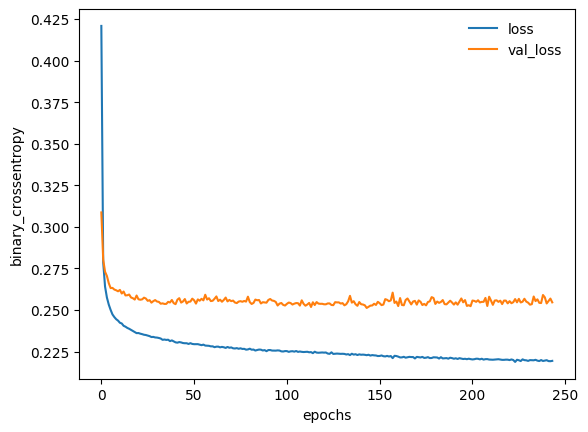

In [25]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)  # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("binary_crossentropy")
plt.show()



In [26]:
# predictで予測を行なう
Y_pred = model.predict(X_test)

# Y_predを表示
Y_pred


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


array([[0.09847023],
       [0.09259344],
       [0.0245604 ],
       ...,
       [0.0707642 ],
       [0.05240745],
       [0.02663246]], dtype=float32)

In [27]:
# 二値分類は予測結果の確率が0.5以下なら0,
# それより大きければ1となる計算で求める
Y_pred_cls = (Y_pred > 0.5).astype("int32")
Y_pred_cls

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [28]:
# 形状を正解（目的変数）に合わせる
Y_pred_ = Y_pred_cls.reshape(-1)

In [29]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3077
           1       0.73      0.53      0.61       622

    accuracy                           0.89      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699

